# EDA on the Age dataset: life, work, and death of 1.22M people

**Summary findings**
- People in this dataset were born between 2700BC and 2016. Their most frequent occupations are artists, politicians and athletes.
- Average age of death is 69 and the average age of death peaked in 1549BC
- Females have a higher age of death, transgender females the lowest
- Psychologists, academics and conductors have the highest average age of death; monarchs, revolutionaries and samurais  the lowest.
- PRC, Slovenia and Israel have the highest average age of death, the Byzantium Empire, G.Duchy of Finland and Kingdom of England, the lowest.
- The top manner of death are natural causes, suicide, accident, homicide and capital punishment

*Looking at capital punishment in detail*
- Most deaths by capital punishment happened to politicians, military personnel artists and religious figures in Germany, USA and Soviet Union
- There was an increase in capital punishment in the 1950s and then in the 2000s. Most that died by capital punishment were men, although there were more women between 1500 and 1700. Most people's age of death were between 20 and 70.**

## Installations and imports

In [1]:
!pip install scikit-learn==0.23
!pip3 install wordcloud
!pip3 install nltk

  Using cached scikit_learn-0.23.0-cp38-cp38-macosx_10_9_x86_64.whl (7.5 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.1
    Uninstalling scikit-learn-1.1.1:
      Successfully uninstalled scikit-learn-1.1.1

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: python3.8 -m pip install --upgrade pip
  Using cached wordcloud-1.8.2.2-cp38-cp38-macosx_10_9_x86_64.whl (158 kB)

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: python3.8 -m pip install --upgrade pip
  Using cached nltk-3.7-py3-none-any.whl (1.5 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.8/289.8 kB 3.9 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: python3.8 -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

## Read data and basic EDA

In [3]:
data = pd.read_csv('/Users/jennatan/code/jennajt/AgeDataset-V1.csv')

In [4]:
data.head(4)

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0


In [5]:
data.describe().round()

,Birth year,Death year,Age of death
count,1223009.0,1223008.0,1223008.0
mean,1845.0,1914.0,69.0
std,148.0,152.0,17.0
min,-2700.0,-2659.0,0.0
25%,1828.0,1895.0,60.0
50%,1887.0,1955.0,72.0
75%,1918.0,1994.0,81.0
max,2016.0,2021.0,169.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223009 entries, 0 to 1223008
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Id                 1223009 non-null  object 
 1   Name               1223009 non-null  object 
 2   Short description  1155109 non-null  object 
 3   Gender             1089363 non-null  object 
 4   Country            887500 non-null   object 
 5   Occupation         1016095 non-null  object 
 6   Birth year         1223009 non-null  int64  
 7   Death year         1223008 non-null  float64
 8   Manner of death    53603 non-null    object 
 9   Age of death       1223008 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 93.3+ MB


In [7]:
(data.isnull().sum().sort_values(ascending=False)/len(data))*100

Manner of death      95.617121
Country              27.433077
Occupation           16.918436
Gender               10.927638
Short description     5.551881
Death year            0.000082
Age of death          0.000082
Id                    0.000000
Name                  0.000000
Birth year            0.000000
dtype: float64

**Over 95% of data missing for mannner of death; quite a bit of missing data for Country, Occupation and Gender**

In [8]:
data.nunique()

Id                   1222997
Name                 1130871
Short description     512439
Gender                    20
Country                 5961
Occupation              9313
Birth year              2173
Death year              2253
Manner of death          206
Age of death             130
dtype: int64

**Columns have many unique values**

## Gender

In [9]:
data.Gender.value_counts()

Male                                              981365
Female                                            107830
Transgender Female                                    79
Transgender Male                                      36
Eunuch; Male                                          18
Intersex                                               7
Female; Male                                           7
Eunuch                                                 3
Transgender Male; Female                               3
Intersex; Female                                       2
Non-Binary                                             2
Intersex; Male                                         2
Transgender Female; Male                               2
Female; Female                                         1
Transgender Female; Intersex                           1
Transgender Female; Female                             1
Transgender Male; Male                                 1
Intersex; Transgender Male     

In [10]:
data[data['Gender']=='Intersex; Female']

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
790679,Q15993521,Georgina Somerset,"British intersex person; Royal Navy officer, l...",Intersex; Female,NaN,Dentist,1923,2013.0,NaN,90.0
1025209,Q27450436,Jemma Redmond,Irish biotechnology pioneer,Intersex; Female,Ireland,Biotechnologist,1978,2016.0,NaN,38.0


In [11]:
# Reduce the number of categories within Gender
rename={'Female; Female':'Female','Eunuch; Male':'Eunuch','Transgender Female; Female':'Transgender Female',
       'Transgender Male; Male':'Transgender Male', 'Intersex; Male': 'Intersex', 'Intersex; Male': 'Intersex'}

data['Gender']=data['Gender'].replace(rename)

data['Gender'].value_counts()

Male                                              981365
Female                                            107831
Transgender Female                                    80
Transgender Male                                      37
Eunuch                                                21
Intersex                                               9
Female; Male                                           7
Transgender Male; Female                               3
Non-Binary                                             2
Transgender Female; Male                               2
Intersex; Female                                       2
Transgender Person; Intersex; Transgender Male         1
Intersex; Transgender Male                             1
Transgender Female; Intersex                           1
Non-Binary; Intersex                                   1
Name: Gender, dtype: int64

In [12]:
# Reduce categories further 
value_counts = data['Gender'].value_counts()
to_remove = value_counts[value_counts>20].index
data = data[data.Gender.isin(to_remove)]

In [13]:
data.Gender.value_counts()

Male                  981365
Female                107831
Transgender Female        80
Transgender Male          37
Eunuch                    21
Name: Gender, dtype: int64

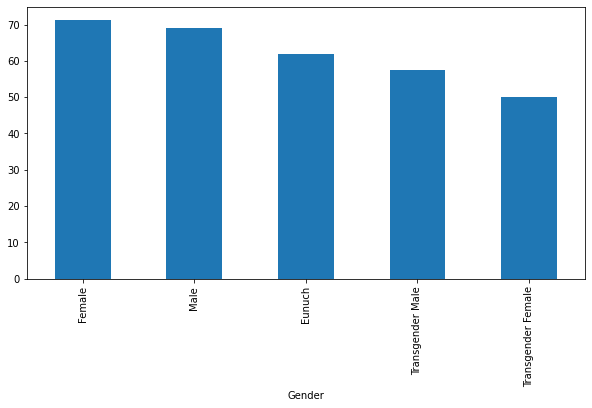

In [14]:
data.groupby('Gender')['Age of death'].mean().sort_values(ascending=False).plot.bar(figsize=(10,5));

**On average females have the highest age of death, transgender female the lowest**

## Occupation

In [15]:
data.Occupation.value_counts()

Artist                                     252145
Politician                                 176753
Athlete                                    106431
Researcher                                  81741
Military personnel                          47234
                                            ...  
Inventor; telegraphist                          1
Esperantist; biologist; esperantologist         1
Fireship captain                                1
Copy editor                                     1
Director; scout leader                          1
Name: Occupation, Length: 8906, dtype: int64

**There are 9313 unique values; need to reduce**

In [16]:
# Reduce the unique occupation values
data['Occupation']=data['Occupation'].astype(str)
data['Occupation_Short']=data['Occupation'].apply(lambda x:x.split(';')[0])

In [17]:
data.Occupation_Short.value_counts()

Artist               252145
Politician           176753
nan                  167577
Athlete              106431
Researcher            81741
                      ...  
Car dealer                1
Airline                   1
Japanophile               1
Technical advisor         1
Nephrologist              1
Name: Occupation_Short, Length: 2346, dtype: int64

**The most frequent occupations in this dataset are artists, politicans and athletes**

In [18]:
data_occupation = data.dropna(subset=['Occupation_Short'])

In [19]:
data_occupation['Occupation_Short'].value_counts().head(5)

Artist        252145
Politician    176753
nan           167577
Athlete       106431
Researcher     81741
Name: Occupation_Short, dtype: int64

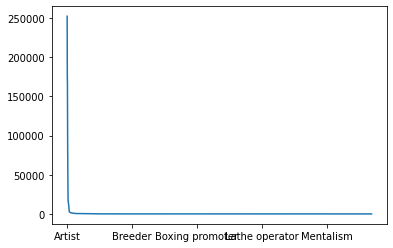

In [20]:
data_occupation['Occupation_Short'].value_counts().plot();

In [21]:
# Reduce categories further 
value_counts = data_occupation['Occupation_Short'].value_counts()
to_remove = value_counts[value_counts>500].index
data_occupation = data_occupation[data_occupation.Occupation_Short.isin(to_remove)]

In [22]:
data_occupation.Occupation_Short.value_counts().head(5)

Artist        252145
Politician    176753
nan           167577
Athlete       106431
Researcher     81741
Name: Occupation_Short, dtype: int64

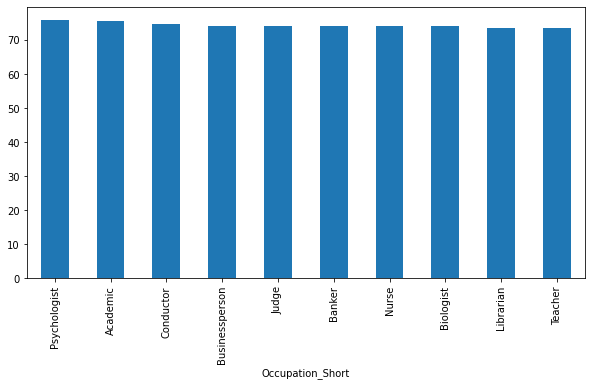

In [23]:
data_occupation.groupby('Occupation_Short')['Age of death'].mean().sort_values(ascending=False).head(10).plot.bar(figsize=(10,5));

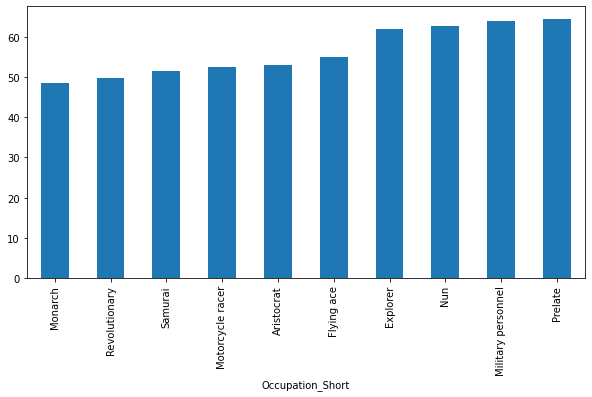

In [24]:
data_occupation.groupby('Occupation_Short')['Age of death'].mean().sort_values(ascending=True).head(10).plot.bar(figsize=(10,5));

**Psychologists, academics and conductors have the highest average age of death; monarchs, revolutionaries and samurais have the lowest age of death**

## Country

In [31]:
data['Country'] = data['Country'].astype(str)
data['Country_Short'] = data['Country'].apply(lambda x:x.split(';')[0])

In [32]:
data.Country_Short.value_counts().head(5)

nan                         292563
United States of America    154040
Germany                      91596
France                       71008
United Kingdom               52186
Name: Country_Short, dtype: int64

In [33]:
# Reduce categories  
value_counts = data['Country_Short'].value_counts()
to_remove = value_counts[value_counts>500].index
data_country = data[data.Country_Short.isin(to_remove)]

In [34]:
data_country.Country_Short.value_counts().head(5)

nan                         292563
United States of America    154040
Germany                      91596
France                       71008
United Kingdom               52186
Name: Country_Short, dtype: int64

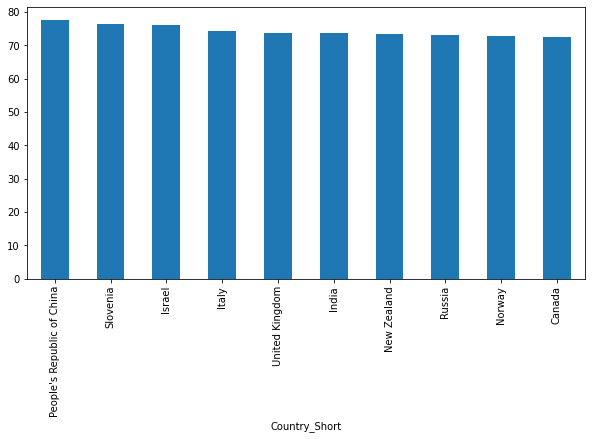

In [35]:
data_country.groupby('Country_Short')['Age of death'].mean().sort_values(ascending=False).head(10).plot.bar(figsize=(10,5));

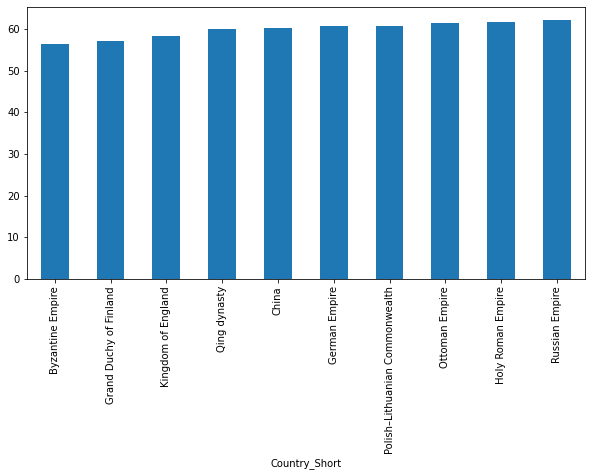

In [109]:
data_country.groupby('Country_Short')['Age of death'].mean().sort_values(ascending=True).head(10).plot.bar(figsize=(10,5));

**PRC, Slovenia and Israel have the highest average age of death,conversely, the Byzantium Empire, G.Duchy of Finland and Kingdom of England**

In [110]:
data['Country_Short'].value_counts().head(5)

nan                         292480
United States of America    154039
Germany                      91593
France                       71004
United Kingdom               70672
Name: Country_Short, dtype: int64

In [111]:
rename={'United Kingdom of Great Britain and Ireland':'United Kingdom'}
data['Country_Short']=data['Country_Short'].replace(rename)

data['Country_Short'].value_counts().head(15)

nan                           292480
United States of America      154039
Germany                        91593
France                         71004
United Kingdom                 70672
Spain                          23935
Canada                         22480
Sweden                         21883
Italy                          19393
Poland                         18845
Kingdom of the Netherlands     15420
Norway                         15090
Austria                        15070
Australia                      14557
Kingdom of Great Britain       12794
Name: Country_Short, dtype: int64

## Manner of death

In [112]:
data['Manner of death'].sample(5)

1187245               NaN
69133      natural causes
899084                NaN
715536                NaN
916448                NaN
Name: Manner of death, dtype: object

In [113]:
data2 = data.dropna(subset=['Manner of death'])

In [114]:
data2['Manner of death'].nunique(5)

197

In [115]:
data2['Manner of death'].sample(5)

6956             homicide
610331     natural causes
292885     natural causes
1012115          accident
265212            suicide
Name: Manner of death, dtype: object

In [116]:
vectorizer = CountVectorizer()

In [117]:
X = vectorizer.fit_transform(data2['Manner of death'])
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [118]:
vectorized_texts = pd.DataFrame(X.toarray(), 
                                columns = vectorizer.get_feature_names(),
                                index = data2['Manner of death'])

In [119]:
vectorized_texts.sum(axis=0).sort_values(ascending=False).head(15)

natural       33576
causes        33575
suicide        5419
accident       4878
homicide       4464
punishment     3189
capital        3189
death           644
unnatural       389
in              255
battle          252
war              23
of               14
world            12
killing           9
dtype: int64

**Top manner of death: natural causes, suicide, accident, homicide and capital punishment**

## Short description

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1089224 entries, 0 to 1223008
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Name               1089224 non-null  object 
 1   Short description  1040729 non-null  object 
 2   Gender             1089224 non-null  object 
 3   Birth year         1089224 non-null  int64  
 4   Death year         1089224 non-null  float64
 5   Manner of death    52102 non-null    object 
 6   Age of death       1089224 non-null  float64
 7   Occupation_Short   1089224 non-null  object 
 8   Country_Short      1089224 non-null  object 
 9   Century            1089224 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 91.4+ MB


In [121]:
data3 = data.dropna(subset=['Short description'])

In [122]:
data3['Short description'].sample(15)

376172                                       Belgian cellist
70136      1st century CE member of the Herodian Dynasty ...
436738                                       American lawyer
283412              French politician, journalist and lawyer
92514                               Swiss artist (1885-1961)
217189                                        Canadian actor
608446                                    Royal Navy admiral
1187889    Arthur Robinson Fearnley (1871-1943) 1942/43 O...
944224                lapszerkesztő, szociáldemokrata vezető
20356                           German biologist (1850-1934)
206108                    British composer and organ builder
264335                                 Belarusian politician
978818                      Norwegian politician (1883-1956)
1105351                            Swiss painter (1819-1902)
55213                                       Olympic wrestler
Name: Short description, dtype: object

In [123]:
text = " ".join(sentence for sentence in data3['Short description'])

In [124]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [125]:
def clean(x):
    x = x.lower()
    cleaned =''.join(char for char in x if not char.isdigit()) 
    for punctuation in string.punctuation:
        cleaned = cleaned.replace(punctuation, '')     
    return cleaned

In [126]:
from nltk.corpus import stopwords 

stop_words = set(stopwords.words('english')) 

In [128]:
cleaned = clean(text)

In [129]:
from wordcloud import WordCloud, ImageColorGenerator

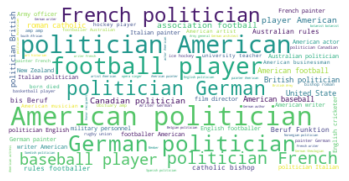

In [130]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Majority of people in the dataset are Western politicians**

## Age of death

In [131]:
data.describe().round()

,Birth year,Death year,Age of death,Century
count,1089224.0,1089224.0,1089224.0,1089224.0
mean,1844.0,1914.0,69.0,20.0
std,146.0,150.0,16.0,2.0
min,-2700.0,-2659.0,1.0,-26.0
25%,1826.0,1893.0,60.0,19.0
50%,1886.0,1954.0,72.0,20.0
75%,1917.0,1994.0,82.0,20.0
max,2016.0,2021.0,169.0,21.0


In [132]:
data.sort_values(by=['Age of death'],ascending=True).head(5)

,Name,Short description,Gender,Birth year,Death year,Manner of death,Age of death,Occupation_Short,Country_Short,Century
563616,Princess Catherine Beatrice of Savoy,Daughter of the Duke of Savoy,Female,1636,1637.0,NaN,1.0,nan,nan,17.0
1217019,"Edward Hyde Villiers, Lord Hyde",(1845-1846),Male,1845,1846.0,NaN,1.0,nan,nan,19.0
930265,Godert Willem de Vos van Steenwijk,1790-1791,Male,1790,1791.0,NaN,1.0,nan,Netherlands,18.0
1146224,Marie Elisabeth von Canitz,NaN,Female,1654,1655.0,NaN,1.0,nan,nan,17.0
1146213,Hans Kaspar von Campe,NaN,Male,1671,1672.0,NaN,1.0,nan,nan,17.0


In [133]:
mask = data['Age of death']>0.0
data = data[mask]
data.sort_values(by=['Age of death'],ascending=True).head(5)

,Name,Short description,Gender,Birth year,Death year,Manner of death,Age of death,Occupation_Short,Country_Short,Century
563616,Princess Catherine Beatrice of Savoy,Daughter of the Duke of Savoy,Female,1636,1637.0,NaN,1.0,nan,nan,17.0
1217019,"Edward Hyde Villiers, Lord Hyde",(1845-1846),Male,1845,1846.0,NaN,1.0,nan,nan,19.0
930265,Godert Willem de Vos van Steenwijk,1790-1791,Male,1790,1791.0,NaN,1.0,nan,Netherlands,18.0
1146224,Marie Elisabeth von Canitz,NaN,Female,1654,1655.0,NaN,1.0,nan,nan,17.0
1146213,Hans Kaspar von Campe,NaN,Male,1671,1672.0,NaN,1.0,nan,nan,17.0


## Death year

In [134]:
data[data['Death year'].isnull()]

,Name,Short description,Gender,Birth year,Death year,Manner of death,Age of death,Occupation_Short,Country_Short,Century


In [135]:
data = data[data['Name'] != 'Issa Annamoradnejad']

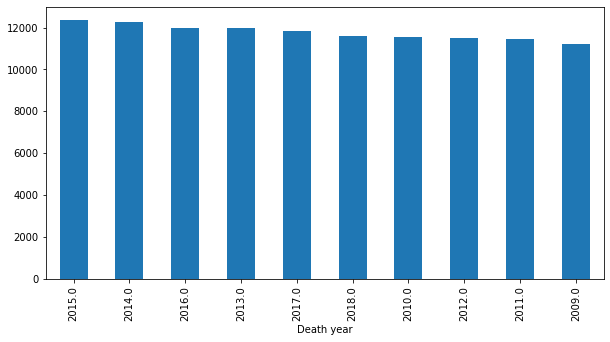

In [136]:
data.groupby('Death year')['Age of death'].count().sort_values(ascending=False).head(10).plot.bar(figsize=(10,5));

**The most deaths occurred in 2015**

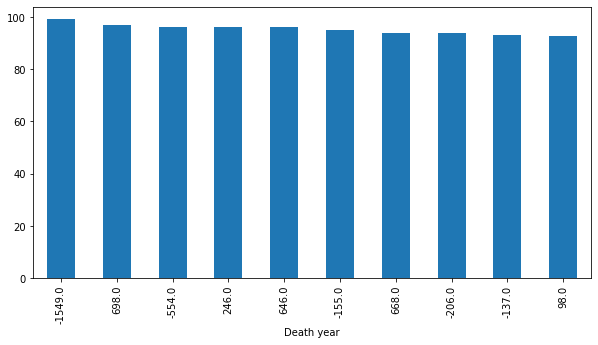

In [137]:
data.groupby('Death year')['Age of death'].mean().sort_values(ascending=False).head(10).plot.bar(figsize=(10,5));

**Average age of death was highest in -1549**

In [138]:
def century(year):
    if (year%100)>0:
        return year//100 +1
    else:
        return year//100
    

In [139]:
data['Century']= data['Death year'].apply(lambda x:century(x))

In [140]:
data.Century.value_counts().head(5)

20.0    577415
21.0    218239
19.0    171905
18.0     51119
17.0     34809
Name: Century, dtype: int64

## Exploring relationships

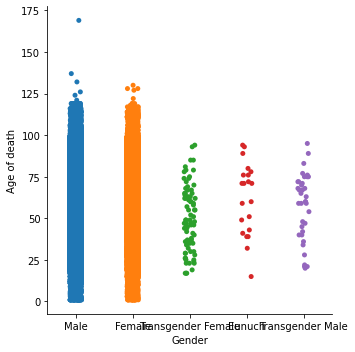

In [142]:
sns.catplot(x='Gender', y='Age of death', data=data);

<AxesSubplot:xlabel='Age of death', ylabel='Count'>

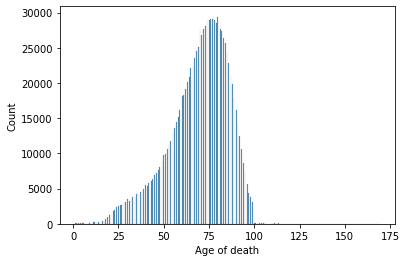

In [143]:
sns.histplot(data['Age of death'])

/Users/jennatan/.pyenv/versions/3.8.12/envs/lewagon_current/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


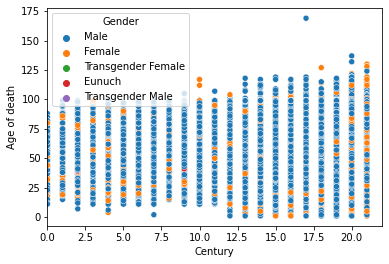

In [144]:
sns.scatterplot(y='Age of death', x='Century', hue='Gender', data=data)
plt.xlim(0, 22);

## Capital punishment

In [145]:
data2['Manner of death'].value_counts().head(20)

natural causes                         33531
suicide                                 5317
accident                                4803
homicide                                4358
capital punishment                      3017
unnatural death                          308
death in battle                          250
capital punishment; unnatural death       79
capital punishment; homicide              42
capital punishment; suicide               38
accident; natural causes                  29
suicide; accident                         23
suicide; homicide                         11
homicide; homicide                        10
Eastern Front of World War II              8
shipwrecking                               7
war                                        7
suicide; natural causes                    7
duel                                       7
extrajudicial killing                      6
Name: Manner of death, dtype: int64

In [146]:
# Filter by word
capital = data2['Manner of death'].str.contains('capital punishment')
capital_df = data2[capital]
capital_df['Manner of death'].value_counts().head(5)

capital punishment                     3017
capital punishment; unnatural death      79
capital punishment; homicide             42
capital punishment; suicide              38
capital punishment; dismemberment         2
Name: Manner of death, dtype: int64

In [147]:
capital_df.dropna(inplace=True)

/var/folders/ck/xg3scjhn503b00cjf3vysm3h0000gn/T/ipykernel_74310/1710970712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capital_df.dropna(inplace=True)


In [148]:
capital_df['Country_Short'].value_counts().head(10)

nan                         827
Germany                     363
United States of America    261
Soviet Union                125
France                      120
Spain                        82
United Kingdom               69
Kingdom of England           64
Hungary                      52
China                        52
Name: Country_Short, dtype: int64

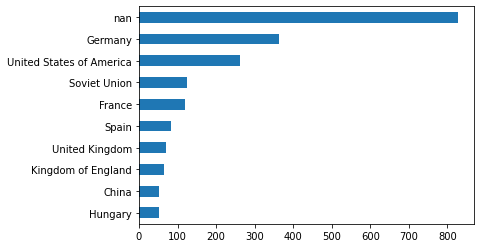

In [149]:
capital_df.Country_Short.value_counts().head(10).sort_values().plot(kind = 'barh');

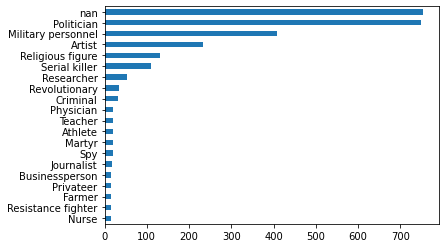

In [150]:
capital_df.Occupation_Short.value_counts().head(20).sort_values().plot(kind='barh');

**Most deaths by capital punishment happened to politicians, military personnel artists and religious figures in Germany, USA and Soviet Union**

''

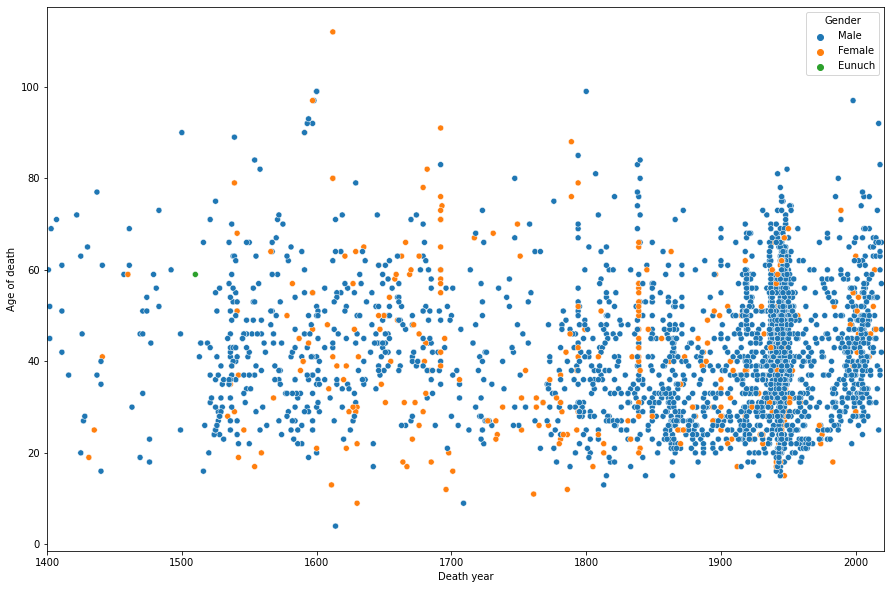

In [151]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Death year', y='Age of death', hue='Gender', data=capital_df)
plt.xlim(1400, 2021)
;

**There was an increase in capital punishsment in the 1950s and then in the 2000s. Most that died by capital punishment were men, although there were more women between 1500 and 1700. Most people's age of death was between 20 and 70.**